In [59]:
# libs for data processing
import pandas as pd
import numpy as np

# libs for visualising data
import matplotlib.pyplot as plt
import seaborn as sns

# Other libs
import calendar
from datetime import datetime
from scipy.stats import linregress

# Don't print warnings
import warnings
warnings.filterwarnings('ignore')

### In this project, we will analyse and visualise behavioural data (time spent on school activities)

#### Data fields and explanation
<ul>
  <li><code>Date</code></li>
  <li><code>Year</code></li>
  <li><code>Block</code> -- Block number - Every academic year is made up of 8 blocks.</li>
  <li><code>Week</code> -- Week of the block. A block is usually 5 weeks long.</li>
  <li><code>word_count</code> -- word count of the entry</li>
  <li><code>Course name</code></li>
  <li><code>Course type</code> -- course/practical/thesis/RTP (Research Traineeship Programme)</li>
  <li><code>Hours</code> -- Hours spent for that session</li>
  <li><code>Stress (1-10)</code> -- score indicating how stressful the session was</li>
  <li><code>Focus (1-10)</code> -- score indicating how focused I was durin the session</li>
</ul>

In [2]:
# read the dataframe
df = pd.read_excel('Time tracker (school).xlsx')

# Select rows that are not 'tutoring Kritika'
df = df[df['Course name'] !='Tutoring Kritika']

# convert date to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M:%S')

In [3]:
df.head(1)

,Date,Year,Block,Week,Course name,Course type,Activity,Hours,Stress (1 -10)\n 10 = very stress,Productivity (1 -10)\n10 = very focused
0,2021-10-20,NaN,NaN,NaN,RTP,RTP,read awe and humility research paper,1.0,NaN,NaN


Select from 2022 (optional)

In [4]:
df = df[df['Date'] >= datetime(2022, 1, 4)]

#### <span style='color:LightGreen'>**Pt1: Find out the following:**</span>
<ul style='color:LightGreen'>
  <li>What is the total number of hours spent on school?
  <li>What is the total number of activity sessions logged?
  <li>What is the average session duration?
</ul>

In [5]:
total_hrs_w_rtp = round(df['Hours'].sum())
total_sess_w_rtp = len(df)
avg_sess_duration_w_rtp = round((total_hrs_w_rtp/total_sess_w_rtp), 1)
avg_sess_duration_w_rtp_mins = round(avg_sess_duration_w_rtp * 60)

print(f'Total number of hours:    {total_hrs_w_rtp} hours')
print(f'Total number of sessions: {total_sess_w_rtp} sessions')
print(f'Avg session duration:     {avg_sess_duration_w_rtp} hrs/session ~{avg_sess_duration_w_rtp_mins} mins/session')

print()
total_hrs = round(df[df['Course type'] != 'RTP']['Hours'].sum())
total_sess = len(df[df['Course type'] != 'RTP'])
avg_sess_duration = round((total_hrs/total_sess), 1)
avg_sess_duration_mins = round(avg_sess_duration * 60)

print(f'Total number of hours:    {total_hrs} hours')
print(f'Total number of sessions: {total_sess} sessions')
print(f'Avg session duration:     {avg_sess_duration} hrs/session ~{avg_sess_duration_mins} mins/session')

Total number of hours:    1258 hours
Total number of sessions: 841 sessions
Avg session duration:     1.5 hrs/session ~90 mins/session

Total number of hours:    1218 hours
Total number of sessions: 820 sessions
Avg session duration:     1.5 hrs/session ~90 mins/session


#### <span style='color:LightGreen'>**Pt2: Find out the following:**</span>
<span style='color:LightGreen'> Grouping by courses and practicals, </span>
<ul style='color:LightGreen'>
  <li>what is the total & average hours spent? 
  <li>what is the total number of activity sessions logged?
  <li>what is the average session duration?
</ul>

Select only courses and practicals

In [6]:
# select
pt2_df = df[(df['Course type'] == 'course') | (df['Course type'] =='practical')]

Get count of number of courses and number of practicals

In [7]:
num_courses = len(df[df['Course type']=='course'].groupby(by='Course name'))
num_practicals = len(df[df['Course type']=='practical'].groupby(by='Course name'))
print(f'num of courses: {num_courses}')
print(f'num of practicals: {num_practicals}')

num of courses: 13
num of practicals: 8


q1: total & average hours spent

In [8]:
# get total hours by course/practical
pt2_total_hrs = pt2_df.groupby(by='Course type')['Hours'].sum().round()

# get average of hours by course/practical
pt2_avg_hrs = pt2_total_hrs.copy()
pt2_avg_hrs['course'] = round(pt2_avg_hrs['course']/num_courses)
pt2_avg_hrs['practical'] = round(pt2_avg_hrs['practical']/num_practicals)

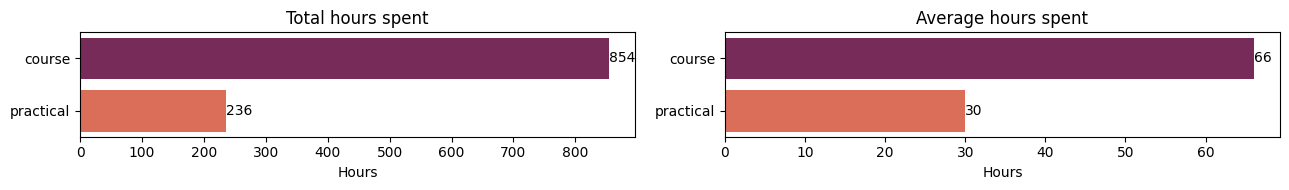

In [9]:
# creating figure
fig, axes = plt.subplots(1, 2, figsize=(13, 2))

# plot total hours spent
sns.barplot(ax=axes[0], y=pt2_total_hrs.index, x=pt2_total_hrs, palette="rocket")
axes[0].set(title='Total hours spent', xlabel='Hours', ylabel='')
axes[0].bar_label(axes[0].containers[0])

# plot average hours spent
sns.barplot(ax=axes[1], y=pt2_avg_hrs.index, x=pt2_avg_hrs, palette="rocket")
axes[1].set(title='Average hours spent', xlabel='Hours', ylabel='')
axes[1].bar_label(axes[1].containers[0])

fig.tight_layout()
fig.show()

Q2: total number of activity sessions logged?

In [10]:
# get total sessions by course/practical
pt2_total_sessions = pt2_df.groupby(by='Course type')['Course type'].count()

# get average num of sessions by course/practical
pt2_avg_sessions = pt2_total_sessions.copy()
pt2_avg_sessions['course'] = round(pt2_avg_sessions['course']/num_courses)
pt2_avg_sessions['practical'] = round(pt2_avg_sessions['practical']/num_practicals)

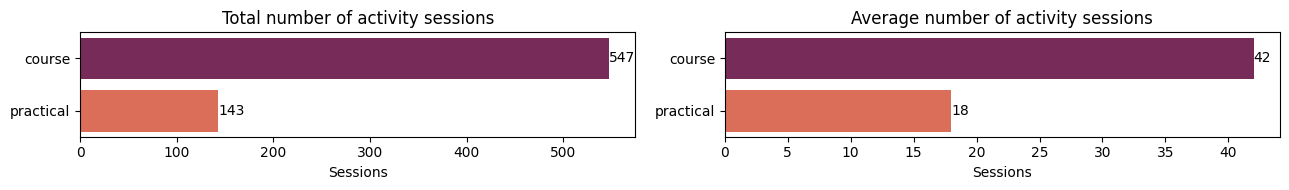

In [48]:
# creating figure
fig, axes = plt.subplots(1, 2, figsize=(13, 2))

# plot total number of sessions
sns.barplot(ax=axes[0], y=pt2_total_sessions.index, x=pt2_total_sessions, palette="rocket")
axes[0].set(title='Total number of activity sessions', xlabel='Sessions', ylabel='')
axes[0].bar_label(axes[0].containers[0])

# plot average number of sessions
sns.barplot(ax=axes[1], y=pt2_avg_sessions.index, x=pt2_avg_sessions, palette="rocket")
axes[1].set(title='Average number of activity sessions', xlabel='Sessions', ylabel='')
axes[1].bar_label(axes[1].containers[0])

fig.tight_layout()
fig.show()

Q3: what is the average session duration?

In [12]:
# get ave course/practical
pt2_avg_sess_dur = pt2_total_hrs.copy()

# get average session duration by course/practical
pt2_avg_sess_dur['course'] = round((pt2_avg_sess_dur['course'] / pt2_total_sessions['course']), 1)
pt2_avg_sess_dur['practical'] = round((pt2_avg_sess_dur['practical'] / pt2_total_sessions['practical']), 1)

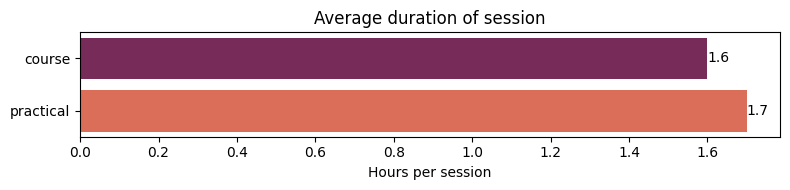

In [50]:
# creating figure
fig, ax = plt.subplots(figsize=(8, 2))

# plot average duration of sessions
ax = sns.barplot(y=pt2_avg_sess_dur.index, x=pt2_avg_sess_dur, palette="rocket")
ax.set(title='Average duration of session', xlabel='Hours per session', ylabel='')
ax.bar_label(ax.containers[0])

fig.tight_layout()
fig.show()

#### <span style='color:LightGreen'>**Pt3: Find out the following:**</span>
<span style='color:LightGreen'> For each subject </span>
<ul style='color:LightGreen'>
  <li>what is the total hours spent? 
  <li>what is the total number of sessions logged?
  <li>what is the average session duration?
</ul>

In [14]:
# get total hours by subject
pt3_total_hrs = df.groupby(by='Course type')['Hours'].sum().round()

# get average of hours by course/practical
pt2_avg_hrs = pt2_total_hrs.copy()
pt2_avg_hrs['course'] = round(pt2_avg_hrs['course']/num_courses)
pt2_avg_hrs['practical'] = round(pt2_avg_hrs['practical']/num_practicals)

In [15]:
# copy df
pt3_df = df.copy()

Q1: Total hours spent

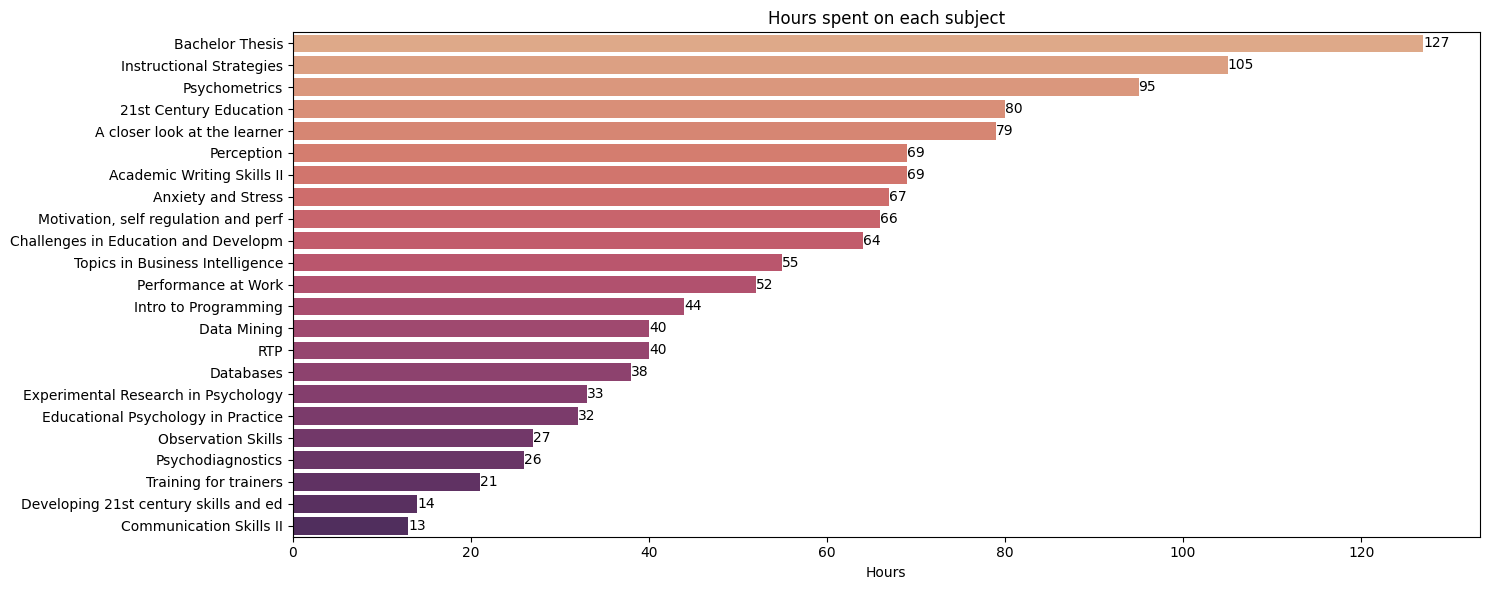

In [16]:
# group by course and sort by total hours
pt3_total_hrs = pt3_df.groupby(by='Course name')['Hours'].sum().round()
# copy and sort values
pt3_total_hrs_sorted = pt3_total_hrs.copy()
pt3_total_hrs_sorted.sort_values(inplace=True, ascending=False)

# plot
fig, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(y=pt3_total_hrs_sorted.index, x=pt3_total_hrs_sorted, orient='h', palette='flare')
ax.set(title='Hours spent on each subject', xlabel='Hours', ylabel='')
ax.bar_label(ax.containers[0])

fig.tight_layout()
fig.show()

Q2: Number of sessions

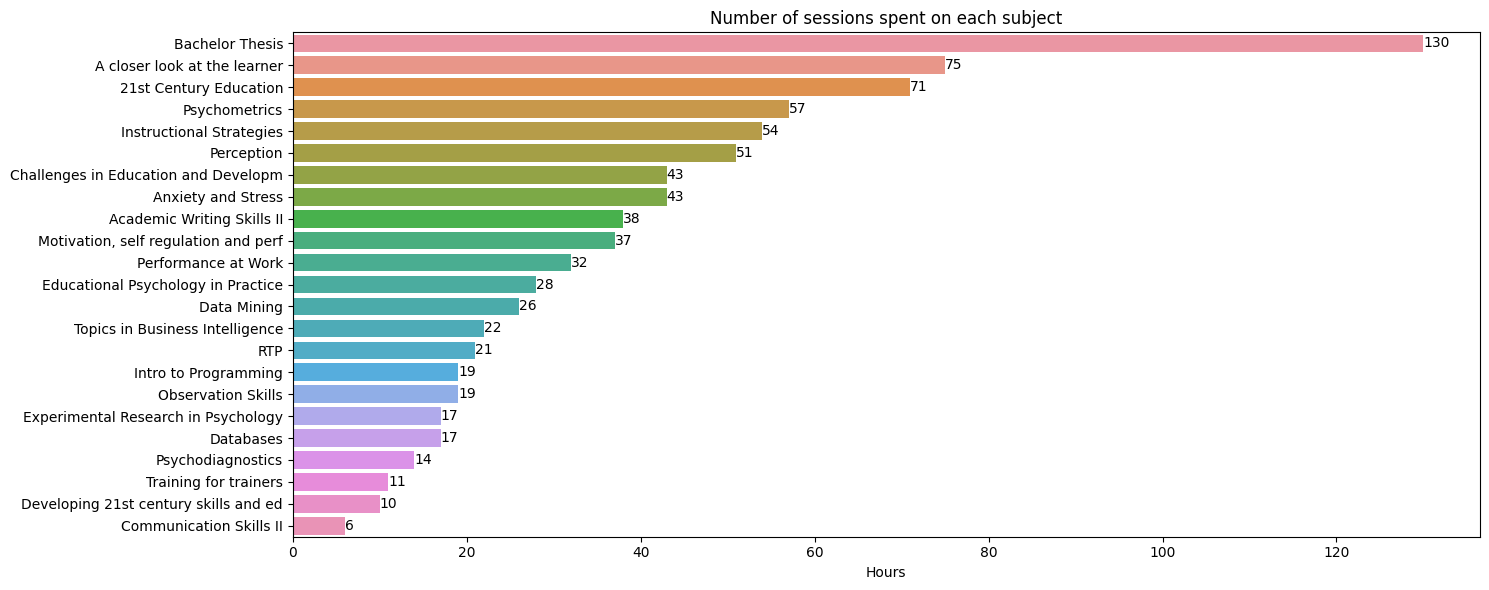

In [17]:
# group by course and sort by total hours
pt2_num_sess = pt3_df.groupby(by='Course name')['Course name'].count()
# copy and sort values
pt2_num_sess_sorted = pt2_num_sess.copy()
pt2_num_sess_sorted.sort_values(inplace=True, ascending=False)

# plot
fig, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(y=pt2_num_sess_sorted.index, x=pt2_num_sess_sorted, orient='h')
ax.set(title='Number of sessions spent on each subject', xlabel='Hours', ylabel='')
ax.bar_label(ax.containers[0])

fig.tight_layout()
fig.show()

Q3: Average duration of sessions

In [18]:
# get total hours for each course
pt3_avg_hrs_per_sess = pt3_df.groupby(by='Course name')['Hours'].sum().round()

new_dict = {}

# loop through keys
for name in pt3_avg_hrs_per_sess.keys():
  # for each key, get the number of sessions (ref pt 2 df)
  num_sess = pt2_num_sess[name]
  # divide variable and store in dictionary
  new_dict[name] = round((pt3_avg_hrs_per_sess[name] / num_sess), 1)

# assign dict to var
pt3_avg_hrs_per_sess = pd.Series(new_dict)

# copy and sort values
pt3_avg_hrs_per_sess_sorted = pt3_avg_hrs_per_sess.copy()
#pt3_avg_hrs_per_sess_sorted.sort_values(inplace=True, ascending=False)

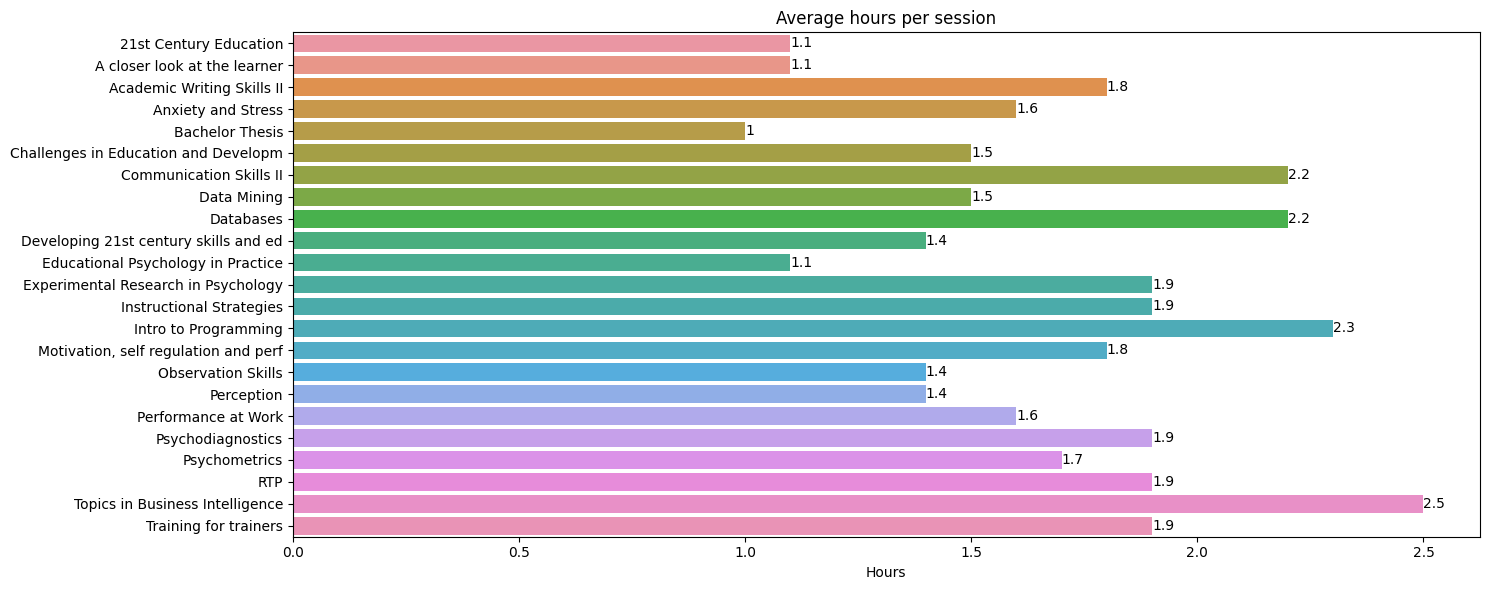

In [19]:
# plot
fig, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(y=pt3_avg_hrs_per_sess_sorted.index, x=pt3_avg_hrs_per_sess_sorted, orient='h')
ax.set(title='Average hours per session', xlabel='Hours', ylabel='')
ax.bar_label(ax.containers[0])

fig.tight_layout()
fig.show()

Plot above 3 charts in 1 graph

In [20]:
# create df to hold new values
pt3_data = {'total_hrs': pt3_total_hrs, 'total_sess': pt2_num_sess, 'avg_hr_per_sess': pt3_avg_hrs_per_sess}
pt3_df_new = pd.DataFrame(data=pt3_data)
pt3_df_new.head()

# sort values according to total hours
pt3_df_new.sort_values(by='total_hrs', ascending=False, inplace=True)

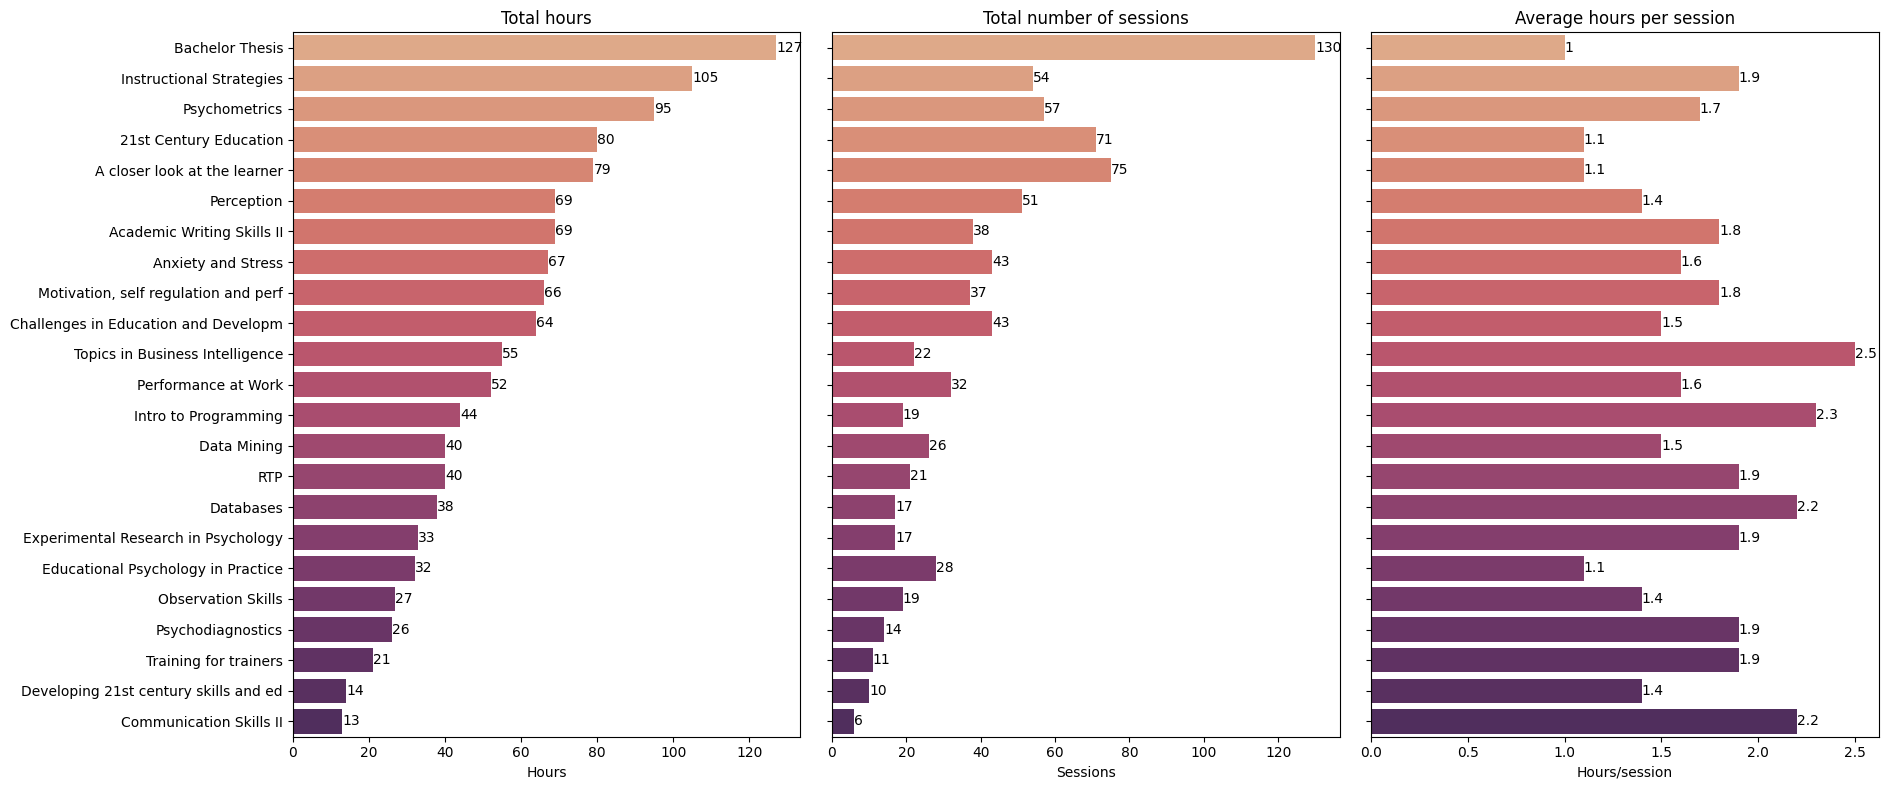

In [21]:
# plot graph
fig, axes = plt.subplots(1, 3, figsize=(19, 8), sharey=True)

sns.barplot(ax=axes[0], data=pt3_df_new, y=pt3_df_new.index, x='total_hrs', orient='h', palette='flare')
axes[0].set(title='Total hours', xlabel='Hours', ylabel='')
axes[0].bar_label(axes[0].containers[0])
#axes[0].grid(visible=True, which='both', axis='x')

sns.barplot(ax=axes[1], data=pt3_df_new, y=pt3_df_new.index, x='total_sess', orient='h', palette='flare')
axes[1].set(title='Total number of sessions', xlabel='Sessions', ylabel='')
axes[1].bar_label(axes[1].containers[0])
#axes[1].grid(visible=True, which='both', axis='x')

sns.barplot(ax=axes[2], data=pt3_df_new, y=pt3_df_new.index, x='avg_hr_per_sess', orient='h', palette='flare')
axes[2].set(title='Average hours per session', xlabel='Hours/session', ylabel='')
axes[2].bar_label(axes[2].containers[0])
#axes[2].grid(visible=True, which='both', axis='x')


fig.tight_layout()
fig.show()


#### <span style='color:LightGreen'>**Pt4: Visualise hours spent per day on a time series**</span>

In [22]:
# select all data
#pt4_df = df.copy()

# select without RTP stuff
pt4_df= df[df['Course type']!= 'RTP']

In [23]:
# We first get the first and last recorded days
firstday =  pt4_df['Date'].min()
lastday = pt4_df['Date'].max()

# get range of dates using 'date_range' function
date_range = pd.date_range(start=firstday, end=lastday, freq='D')

# create a dataframe using date range as index (init all values to null)
daily_hrs = pd.DataFrame(data={'Hours': [pd.NA for i in date_range]}, index=date_range)


# From data df, group by date and sum hours, then convert to dataframe
pt4_hrs_by_date = pt4_df.groupby(by='Date')['Hours'].sum()
pt4_hrs_by_date = pt4_hrs_by_date.to_frame()

# merge on index. drop useless column. fill na values with 0
daily_hrs = daily_hrs.join(pt4_hrs_by_date, lsuffix='Hours').drop(columns='HoursHours').fillna(0)

Plot daily sum

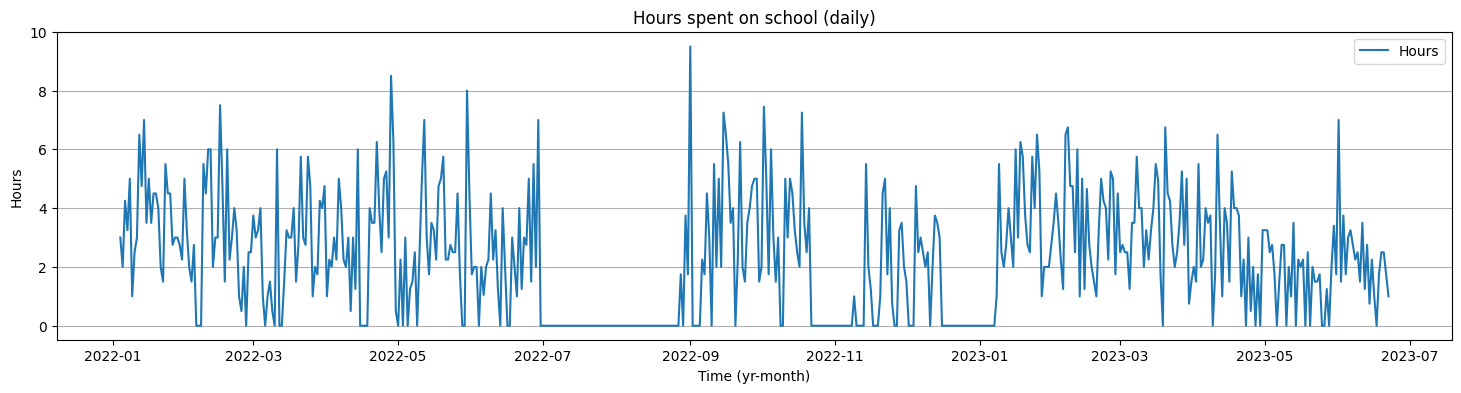

In [24]:
# plot daily
fig, ax = plt.subplots(figsize=(18, 4))
ax = sns.lineplot(data=daily_hrs)
ax.set(title='Hours spent on school (daily)', xlabel='Time (yr-month)', ylabel='Hours')
plt.yticks(ticks=[i for i in range(0, 11, 2)])
ax.grid(visible=True, which='both', axis='y')

Plot weekly sum

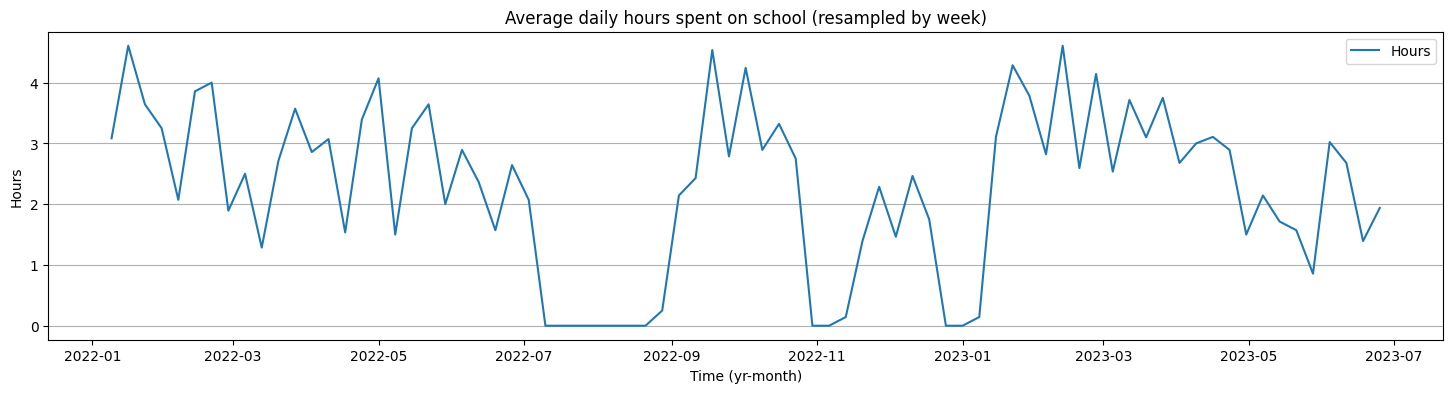

In [25]:
# resample to weekly frequency, aggregating with MEAN (thus, plotting daily mean)
pt4_daily_mean = daily_hrs[['Hours']].resample('W').mean()

# plot weekly sum
fig, axes = plt.subplots(figsize=(18, 4))
ax = sns.lineplot(data=pt4_daily_mean)
ax.set(title='Average daily hours spent on school (resampled by week)', xlabel='Time (yr-month)', ylabel='Hours')
ax.grid(visible=True, which='both', axis='y')

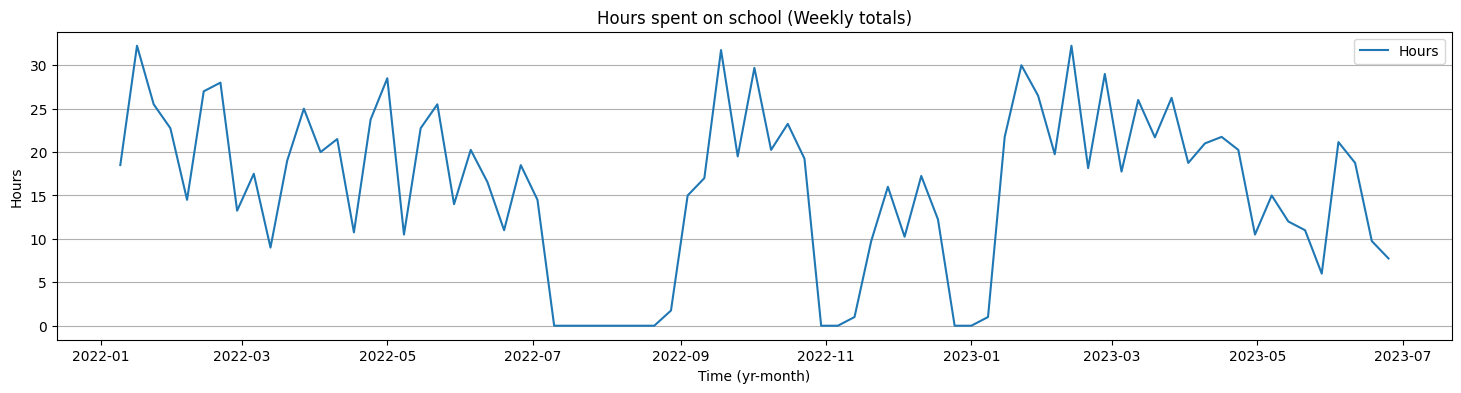

In [26]:
# resample the data to weekly frequency, aggregating with SUM
pt4_weekly_sum = daily_hrs[['Hours']].resample('W').sum()

# plot weekly sum and weekly mean
fig, ax = plt.subplots(figsize=(18, 4))
ax = sns.lineplot(data=pt4_weekly_sum)
ax.set(title='Hours spent on school (Weekly totals)', xlabel='Time (yr-month)', ylabel='Hours')
#plt.yticks(ticks=[i for i in range(0, 11, 1)])
ax.grid(visible=True, which='both', axis='y')

#### <span style='color:LightGreen'>**Pt5: Which day of the week do I spend the most time on school?**</span>

In [27]:
# select without RTP stuff
pt5_df= df[df['Course type']!= 'RTP']

# From data df, group by date and sum hours, then convert to dataframe
pt5_df = pt5_df.groupby(by='Date')['Hours'].sum()
pt5_df = pt5_df.to_frame()

# create a new column for day of the week and set values using index
pt5_df['day of week'] = pt5_df.index.to_series().dt.dayofweek

# group by day of week. Get sum of hours
hrs_by_day = pt5_df.groupby(by='day of week')['Hours'].mean().round(1)

# create a list for day of the week (above function is mapped in this order)
day_of_wk = ['Monday', "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

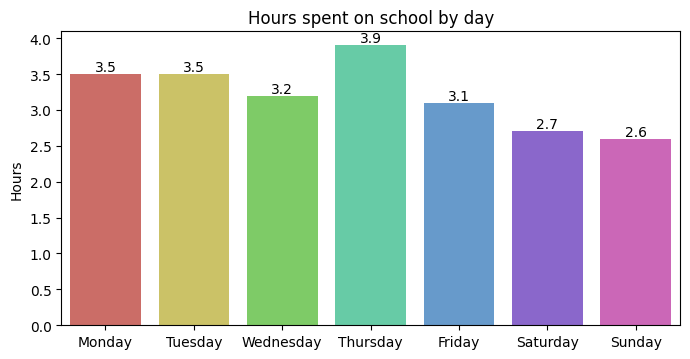

In [58]:
# plot average hours spent on school by day of the week
fig, ax = plt.subplots(figsize=(7, 3.7))
sns.barplot(y=hrs_by_day, x=day_of_wk, palette="hls")
ax.set(title='Hours spent on school by day', ylabel='Hours')
ax.bar_label(ax.containers[0])

fig.tight_layout()
fig.show()

#### <span style='color:LightGreen'>**Pt6: Consistency**</span>
<span style='color:LightGreen'>We look at hours spent over weeks for: </span>  

<ul style='color:LightGreen'>
  <li>Grouped by courses/practicals
  <li>All examinable subjects collapsed  
  <li>Every subject individually
  </ul>

We also drop all rows for week 0 that are not 'thesis'

In [29]:
# copy df without RTP
pt6_df= df[df['Course type']!= 'RTP']

# drop activities recorded for week 0 that are not 'thesis'
pt6_to_drop = pt6_df[(pt6_df['Week']==0) & (pt6_df['Course type']!='thesis')].index
pt6_df.drop(labels=pt6_to_drop, inplace=True)

# get all course names in order of how they appeared in the list
course_names = pt6_df['Course name'].drop_duplicates().to_list()

Plot average time spent by week (COURSE)

It is necessary to know that for some courses, there were extra weeks (frm wk 6 to 8, or wk 0 where prep work was done) so extra calculations need to be done

In [30]:
# copy df for all course only
pt6_df_courses = pt6_df[pt6_df['Course type'] == 'course']

In [31]:
# pt1: get a list of sum hours for each week
sum_hrs_by_wk_course = pt6_df_courses.groupby(by='Week')['Hours'].sum()

# pt2: make a dictionary to hold keys of weeks. For each week, hold a list of values for courses eg. {1: set['course1', 'course2']}
courses_in_week = {}

# group by week and course and loop through
for grp_var in pt6_df_courses.groupby(by=['Week', 'Course name']).groups.keys():
  wk, name = grp_var[0], grp_var[1]
  if wk not in courses_in_week.keys():
    courses_in_week[wk] = set()
  courses_in_week[wk].add(name)

# pt3: divide total hours for each week by number of courses in that week
avg_hrs_wk_course = sum_hrs_by_wk_course.copy()
for wk, hrs in avg_hrs_wk_course.items():
  avg_hrs_wk_course[wk] = hrs/len(courses_in_week[wk])

Plot average time spent by week (Practical)

It is necessary to know that for some practicals, there were extra weeks (frm wk 6 to 8, or wk 0 where prep work was done) so extra calculations need to be done

In [32]:
# copy df for all course only
pt6_df_practical = pt6_df[pt6_df['Course type'] == 'practical']

In [33]:
# pt1: get a list of sum hours for each week
sum_hrs_by_wk_practical = pt6_df_practical.groupby(by='Week')['Hours'].sum()

# pt2: make a dictionary to hold keys of weeks. For each week, hold a list of values for courses eg. {1: set['course1', 'course2']}
practicals_in_week = {}

# group by week and course and loop through
for grp_var in pt6_df_courses.groupby(by=['Week', 'Course name']).groups.keys():
  wk, name = grp_var[0], grp_var[1]
  if wk not in practicals_in_week.keys():
    practicals_in_week[wk] = set()
  practicals_in_week[wk].add(name)

# pt3: divide total hours for each week by number of courses in that week
avg_hrs_wk_practical = sum_hrs_by_wk_practical.copy()
for wk, hrs in avg_hrs_wk_practical.items():
  avg_hrs_wk_practical[wk] = hrs/len(practicals_in_week[wk])
  


Plot both courses and practical

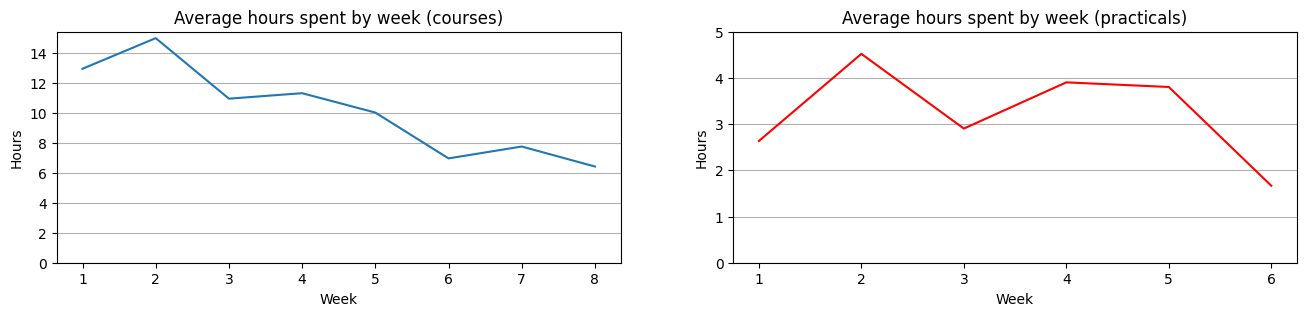

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(16, 3))

#sns.lineplot(ax=axes[0], data=pt6_pract_course_hrs, y='course_hrs', x=pt6_pract_course_hrs.index, label='course')
sns.lineplot(ax=axes[0], data=avg_hrs_wk_course)
axes[0].set(title='Average hours spent by week (courses)', xlabel='Week', ylabel='Hours')
axes[0].grid(visible=True, which='both', axis='y')
axes[0].set_yticks((np.arange(0, 16, 2)))

sns.lineplot(ax=axes[1], data=avg_hrs_wk_practical, color='r')
axes[1].set(title='Average hours spent by week (practicals)', xlabel='Week', ylabel='Hours')
# set y axis to integers + set y axis tick size
axes[1].locator_params(axis='y', integer=True, tight=True)
axes[1].grid(visible=True, which='both', axis='y')
axes[1].set_yticks((np.arange(0, 6, 1)))

fig.tight_layout
fig.show()

Caveats of this chart is that for some courses, the final exam ends earlier in the week (eg. on a monday or tuesday). If that happens, there are lesser study sessions and thus, lesser hours for the last weeks.  

What we can do is to take the number of hours for that week divided by number of days recorded for that week.  
(num hrs for wk) / (num days recorded for wk) 

Plot total hours spent each week (all subjects)  

For we drop week time recorded for week 0s that are not thesis

For this, 

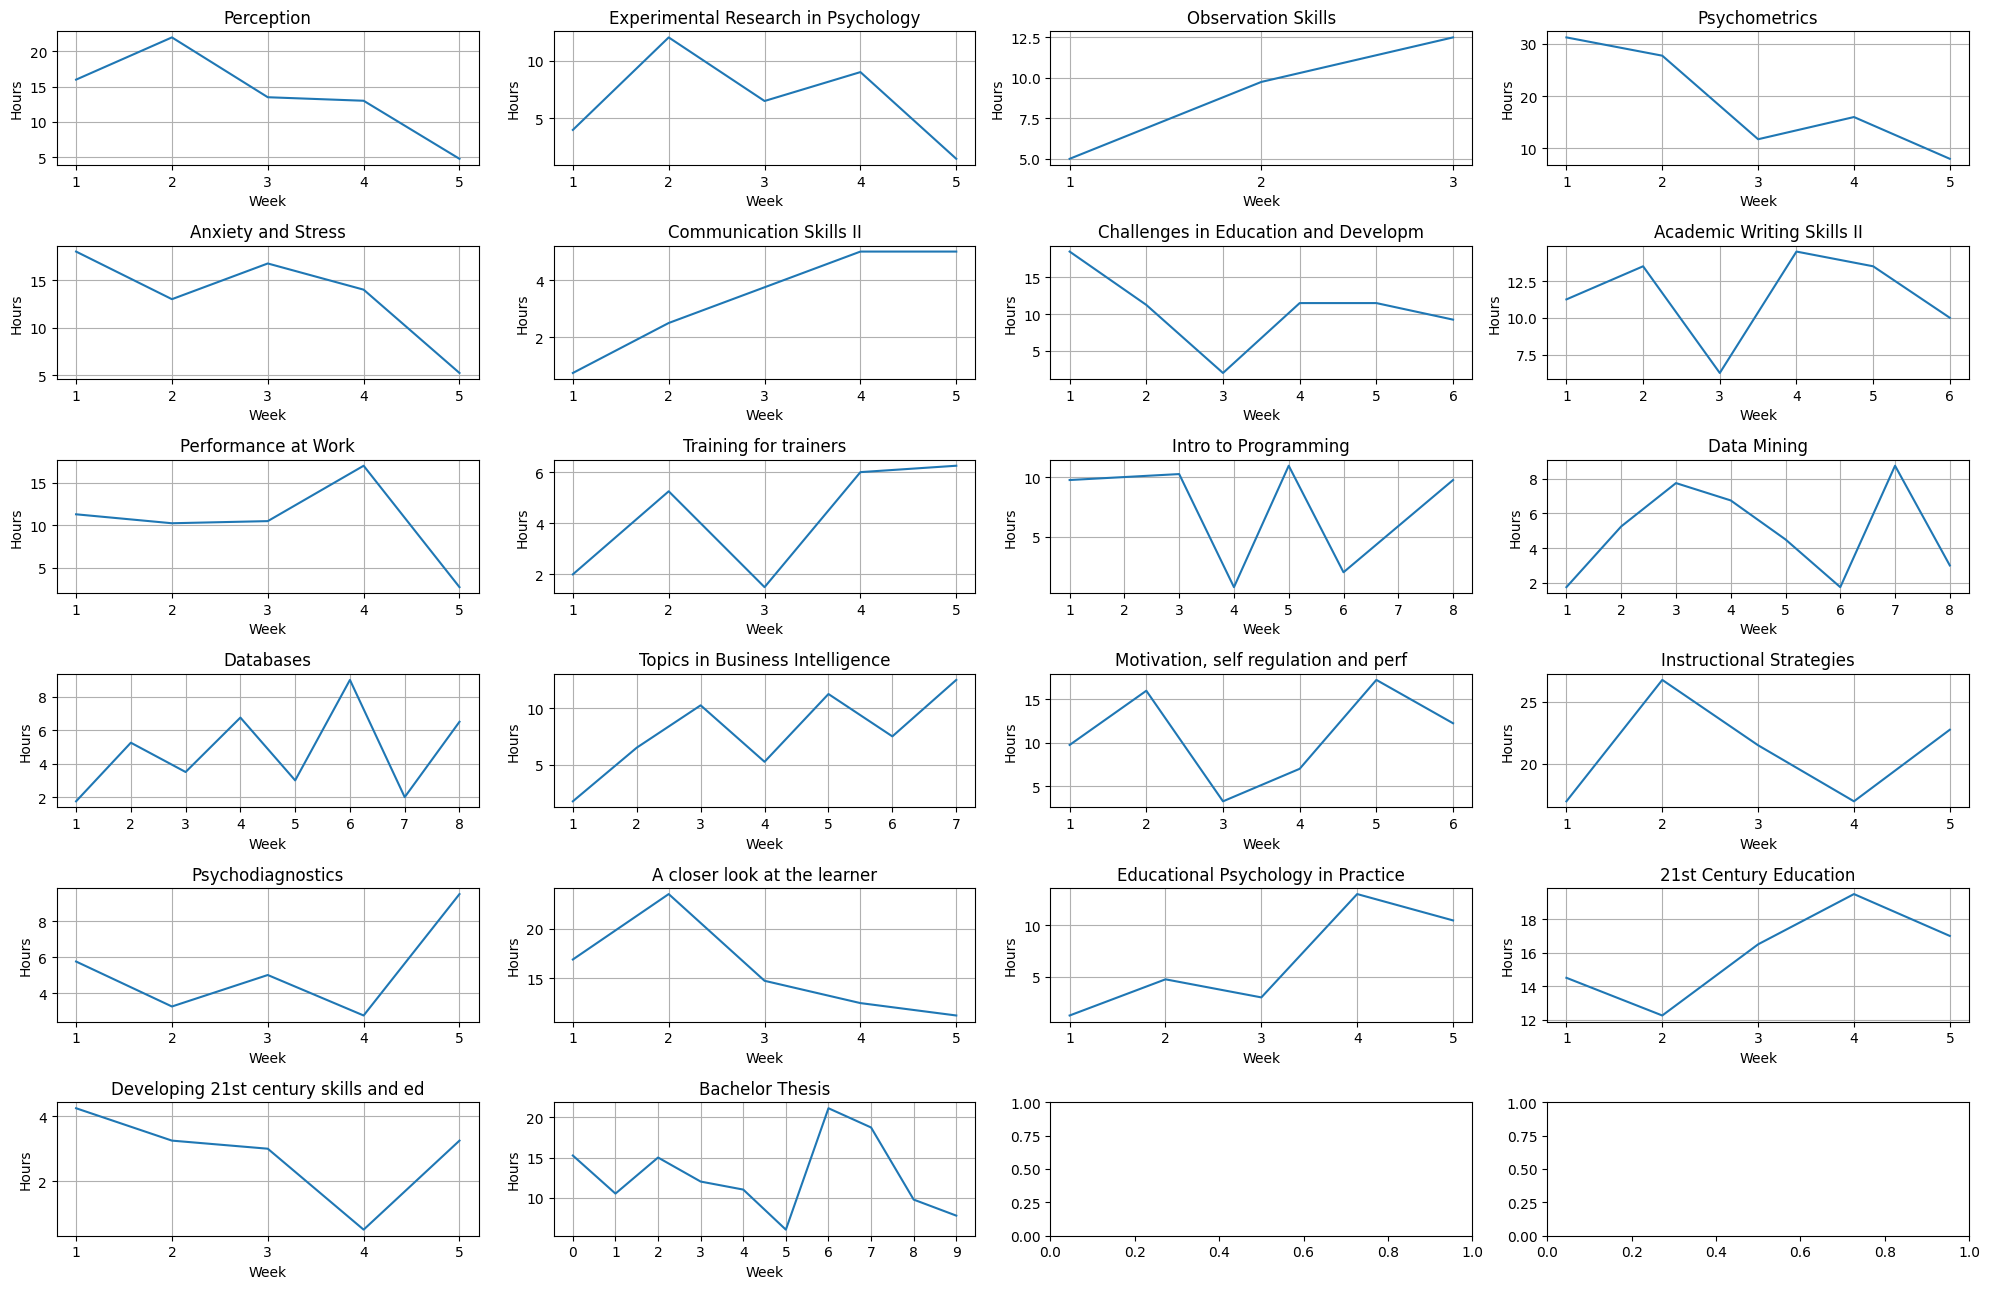

In [35]:
row_n = 6
col_n = 4

fig, axes = plt.subplots(row_n, col_n, figsize=(20, 13))

# create a counter to loop through columns name list
iterator = 0

for row_num in range(row_n):
  for col_num in range(col_n):    
    # select column name using the index
    course_name = course_names[iterator]
    # select rows for that course
    course_data = pt6_df[pt6_df['Course name'] == course_name]
    # group by week and then sum hours for each week
    wk_grp = course_data.groupby(by='Week')['Hours'].sum()
    
    # Plot data. set title & axis labels. Set grid
    sns.lineplot(ax=axes[row_num, col_num], data=wk_grp)
    axes[row_num, col_num].set(title=f'{course_name}', xlabel='Week', ylabel='Hours')
    axes[row_num, col_num].grid(visible=True, which='both', axis='both')

    # show all weeks on x axis
    axes[row_num, col_num].set_xticks((np.arange(min(wk_grp.keys()), max(wk_grp.keys())+1, 1)))
    # set axix ticks to be integers only
    #axes[row_num, col_num].locator_params(axis="both", integer=True, tight=True)

    # add iterator
    iterator += 1

    # exit loop when iterator == number of coures
    if iterator == len(course_names):
      break
  if iterator == len(course_names):
    break

fig.tight_layout()
fig.show()

plot the proportion of hours spent each week (all subjects)

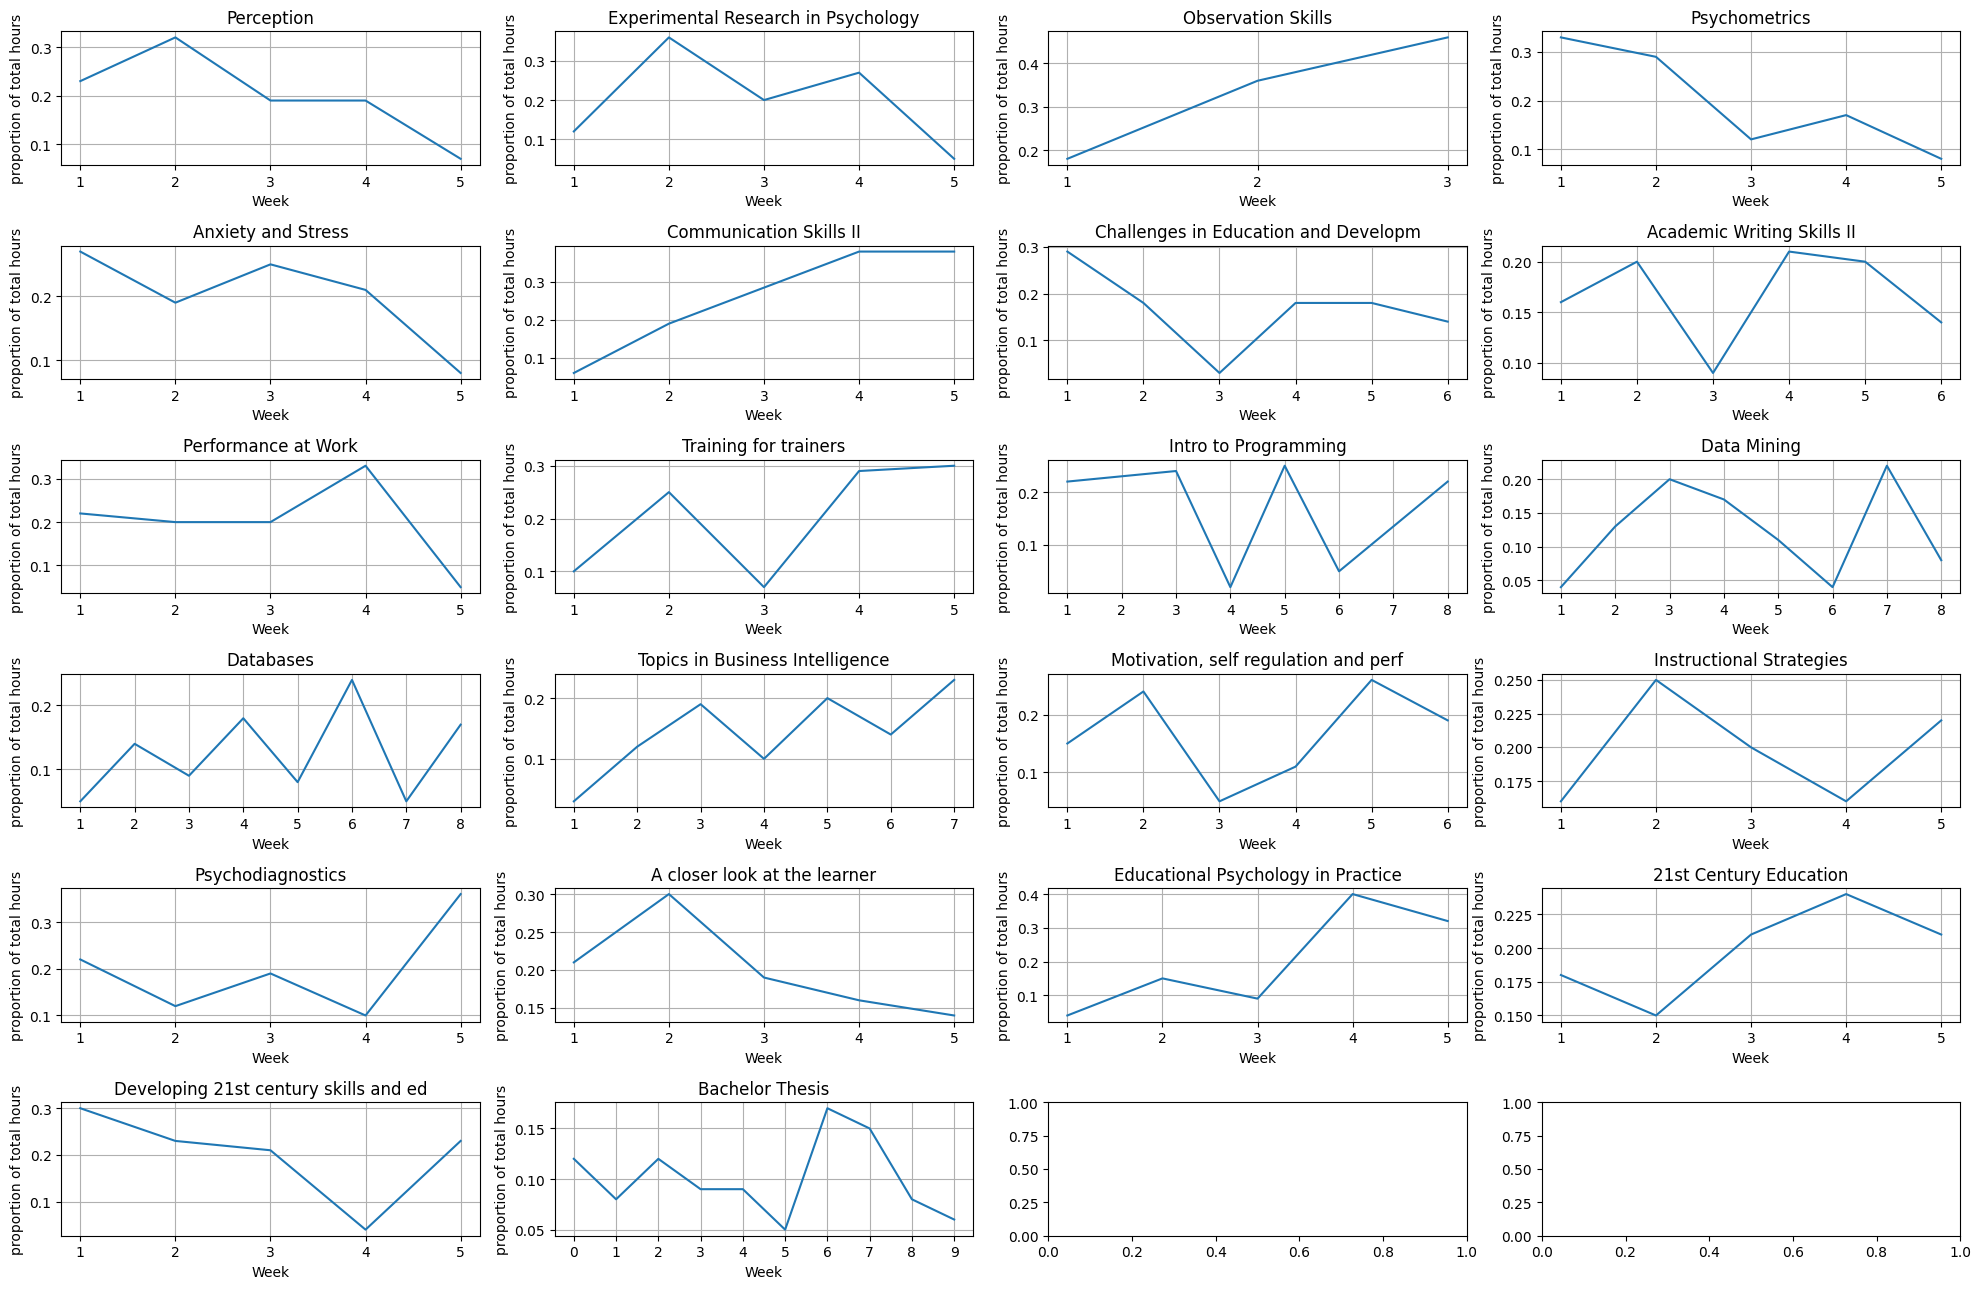

In [36]:
row_n = 6
col_n = 4

fig, axes = plt.subplots(row_n, col_n, figsize=(20, 13))

# create a counter to loop through columns name list
iterator = 0

for row_num in range(row_n):
  for col_num in range(col_n):
    # select column name using the index
    course_name = course_names[iterator]
    # select rows for that course
    course_data = pt6_df[pt6_df['Course name'] == course_name]
    # get total hours spent for the course
    course_total_hrs = course_data['Hours'].sum()
    
    # group by week and then sum hours for each week
    wk_grp = course_data.groupby(by='Week')['Hours'].sum()
    
    # get proportion of hours spent over total for each week
    for key, value in wk_grp.items():
      wk_grp[key] = round((value / course_total_hrs), 2)
    
    # Plot data. set title & axis labels. Set grid
    sns.lineplot(ax=axes[row_num, col_num], data=wk_grp)
    axes[row_num, col_num].set(title=f'{course_name}', xlabel='Week', ylabel='proportion of total hours')
    axes[row_num, col_num].grid(visible=True, which='both', axis='both')

    # show all weeks on x axis
    axes[row_num, col_num].set_xticks((np.arange(min(wk_grp.keys()), max(wk_grp.keys())+1, 1)))
    # set axix ticks to be integers only
    #axes[row_num, col_num].locator_params(axis="both", integer=True, tight=True)

    # add iterator
    iterator += 1

    # exit loop when iterator == number of coures
    if iterator == len(course_names):
      break
  if iterator == len(course_names):
    break

fig.tight_layout()
fig.show()

#### <span style='color:LightGreen'>**Pt7: Predicting thesis grade**</span>

<div style='color:LightGreen'>
<span>We need to first extract all the features from each course/practical and hold them in a new dataframe.</span>

We drop all week 0s activities that are not thesis as they are neligible and potentially affects the slope coefficients.  
  
List of features for each course will include: 



<ul>
  <li>Course grade
  <li>Total hours spent
  <li>Number of weeks of course 
  <li>Total number of sessions
  <li>Total number of activity days
</ul>

Other features through feature engineering:
<ul>
  <li>Avg hrs per session (Total hrs/total sessions)
  <li>Avg hrs per session by week (slope coefficient of (Total hrs for week/total num of sessions for that week))
</ul>
<ul>
  <li>Avg hrs per week (Total hrs/total weeks)
  <li>Avg hrs per day by week (slope coefficient of above on weekly plot)
</ul>
<ul>
  <li>Avg hrs per day (Total hrs/total activity days)
  <li>Avg hrs per day by week (slope coefficient of (Total hrs for week/total activity sessions for that week))
</ul>

</div>

In [37]:
# copy df without RTP. Drop all week 0 and not 'thesis'
pt7_df= df[df['Course type']!= 'RTP']
pt7_to_drop = pt7_df[(pt7_df['Week']==0) & (pt7_df['Course type']!='thesis')].index
pt7_df.drop(labels=pt7_to_drop, inplace=True)

# get all course names in order of how they appeared in the list
pt7_course_names = pt7_df['Course name'].drop_duplicates().to_list()

In [38]:
# Create another DF to hold all features
columns = ['course name', 'grade', 'total hrs', 'num weeks', 'total sessions', 'total activity days',
           'avg_hrs_per_sess', 'avg_hrs_per_sess_by_wk_slope',
           'avg_hrs_per_wk', 'hrs_per_wk_slope', 'hrs_per_wk_prop_slope',
           'avg_hrs_per_day', 'avg_hrs_per_day_by_wk_slope']

# add columns
pt7_features_df = pd.DataFrame(columns=columns)

# add course names
pt7_features_df['course name'] = pt7_course_names
pt7_features_df.head(2)

,course name,grade,total hrs,num weeks,total sessions,total activity days,avg_hrs_per_sess,avg_hrs_per_sess_by_wk_slope,avg_hrs_per_wk,hrs_per_wk_slope,hrs_per_wk_prop_slope,avg_hrs_per_day,avg_hrs_per_day_by_wk_slope
0,Perception,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Experimental Research in Psychology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Add course grades

In [39]:
# read df
df_grades = pd.read_excel('Time tracker (school).xlsx', sheet_name='school grades', index_col='course name').reset_index()

# add new row to 'df_grades' for Psychometrics that is the average of both scores
new_row = {'course name': 'Psychometrics', 'grade': round(((7+9.5)/2), 1)}
# Use loc method to add the new row.
df_grades.loc[len(df_grades)] = new_row

# Delete other 2 psychometric rows
to_drop_frm_grades = df_grades[(df_grades['course name']=='Psychometrics (course)') | (df_grades['course name']=='Psychometrics (practical)')].index
df_grades.drop(labels=to_drop_frm_grades, inplace=True)

# reset index
df_grades.reset_index(drop=True, inplace=True)

In [40]:
# Join features and grade dfs on 'course name' column
pt7_features_df = pt7_features_df.merge(df_grades, how='left', on='course name')

# remove useless column and move columns
pt7_features_df.drop(columns=['grade_x'], inplace=True)
pt7_features_df.insert(1, 'grade', pt7_features_df.pop('grade_y'), False)

Add total hours spent

In [41]:
# calc hrs & convert to df
get_hrs = pt7_df.groupby(by='Course name')['Hours'].sum().round(1)
get_hrs.to_frame().reset_index()

# merge info and drop useless column
pt7_features_df = pt7_features_df.merge(get_hrs, how='left', left_on='course name', right_on='Course name')
pt7_features_df['total hrs'] = pt7_features_df['Hours']
pt7_features_df.drop(columns=['Hours'], inplace=True)

Add number of weeks for the course

In [42]:
# calc hrs & convert to df
get_wks = pt7_df.groupby(by='Course name')['Week'].max()
get_wks.to_frame().reset_index()

# merge info and drop useless column
pt7_features_df = pt7_features_df.merge(get_wks, how='left', left_on='course name', right_on='Course name')
pt7_features_df['num weeks'] = pt7_features_df['Week']
pt7_features_df.drop(columns=['Week'], inplace=True)

Add total number of sessions

In [43]:
# calc number of sessions & convert to df
get_sess = pt7_df.groupby(by='Course name')['Activity'].count()
get_sess.to_frame().reset_index()

# merge info and drop useless column
pt7_features_df = pt7_features_df.merge(get_sess, how='left', left_on='course name', right_on='Course name')
pt7_features_df['total sessions'] = pt7_features_df['Activity']
pt7_features_df.drop(columns=['Activity'], inplace=True)

Add total number of activity days

In [44]:
# calc number of activity days & convert to df
# drop duplicates for days and then group by course name and get count
get_days = pt7_df.drop_duplicates(subset='Date').groupby(by='Course name')['Activity'].count()
get_days.to_frame().reset_index()

# merge info and drop useless column
pt7_features_df = pt7_features_df.merge(get_days, how='left', left_on='course name', right_on='Course name')
pt7_features_df['total activity days'] = pt7_features_df['Activity']
pt7_features_df.drop(columns=['Activity'], inplace=True)

Add:  
-avg_hrs_per_sess  
-avg_hrs_per_wk  
-avg_hrs_per_day  

In [45]:
pt7_features_df['avg_hrs_per_sess'] = round( (pt7_features_df['total hrs'] / pt7_features_df['total sessions'] ), 1)
pt7_features_df['avg_hrs_per_wk'] = round( (pt7_features_df['total hrs'] / pt7_features_df['num weeks'] ), 1)
pt7_features_df['avg_hrs_per_day'] =  round( (pt7_features_df['total hrs'] / pt7_features_df['total activity days'] ), 1)

In [46]:
pt7_features_df.head(2)

,course name,grade,total hrs,num weeks,total sessions,total activity days,avg_hrs_per_sess,avg_hrs_per_sess_by_wk_slope,avg_hrs_per_wk,hrs_per_wk_slope,hrs_per_wk_prop_slope,avg_hrs_per_day,avg_hrs_per_day_by_wk_slope
0,Perception,8.7,69.2,5.0,51,24,1.4,NaN,13.8,NaN,NaN,2.9,NaN
1,Experimental Research in Psychology,8.4,33.0,5.0,17,6,1.9,NaN,6.6,NaN,NaN,5.5,NaN


Add:  Avg hrs per session by week  (slope coeff)
(slope coefficient of (Total hrs for week/total num of sessions for that week))

In [47]:
# init a list to save values
avg_hrs_per_sess_by_wk_slope = []

# loop through courses
for name in pt7_course_names:
  # get data for that course
  course_data = pt7_df[pt7_df['Course name'] == name]
  
  # group by week and then sum hours for each week
  sum_hrs_wk_grp = course_data.groupby(by='Week')['Hours'].sum()
  
  # get sum sessions for each week
  sum_sess_wk_grp = course_data.groupby(by='Week')['Activity'].count()
  
  # get sum hrs per wk / sum sess per wk
  divide = sum_hrs_wk_grp.divide(sum_sess_wk_grp)
  
  # calc regression and get slope coeff
  reg = linregress(x=divide.index, y=divide, alternative='two-sided').slope
  avg_hrs_per_sess_by_wk_slope.append(reg)

NameError: name 'linregress' is not defined

In [ ]:
# add avg_hrs_per_sess_by_wk_slope
pt7_features_df['avg_hrs_per_sess_by_wk_slope'] = avg_hrs_per_sess_by_wk_slope
pt7_features_df.head(2)

,course name,grade,total hrs,num weeks,total sessions,total activity days,avg_hrs_per_sess,avg_hrs_per_sess_by_wk_slope,avg_hrs_per_wk,hrs_per_wk_slope,hrs_per_wk_prop_slope,avg_hrs_per_day,avg_hrs_per_day_by_wk_slope
0,Perception,8.7,69.2,5.0,51,24,1.4,-0.045833,13.8,NaN,NaN,2.9,NaN
1,Experimental Research in Psychology,8.4,33.0,5.0,17,6,1.9,-0.190000,6.6,NaN,NaN,5.5,NaN


Add:  hrs per wk  + hrs per wk (prop) coeffs  
(slope coefficient of (Total hrs for week/total num of week))  
(slope coefficient of (hrs for that week/total hours)/total num of week)

In [ ]:
# init lists to save values
hrs_per_wk_slope = []
hrs_per_wk_prop_slope = []

# loop through courses
for i, name in enumerate(pt7_course_names):
  # get data for that course
  course_data = pt7_df[pt7_df['Course name'] == name]
  
  # group by week and then sum hours for each week
  sum_hrs_wk_grp = course_data.groupby(by='Week')['Hours'].sum()
  
  # calc regression and get slope coeff
  reg = linregress(x=sum_hrs_wk_grp.index, y=sum_hrs_wk_grp, alternative='two-sided').slope
  hrs_per_wk_slope.append(reg)
    
  # get hrs each week as a proportion of total course hrs ~~~~
  # get total hours spent for the course
  course_total_hrs = course_data['Hours'].sum()
  
  # get proportion of hours spent over total for each week
  for key, value in sum_hrs_wk_grp.items():
    sum_hrs_wk_grp[key] = round((value / course_total_hrs), 2)
  
  # calc regression and get slope coeff
  reg = linregress(x=sum_hrs_wk_grp.index, y=sum_hrs_wk_grp, alternative='two-sided').slope
  hrs_per_wk_prop_slope.append(reg)

In [ ]:
# add hrs_per_wk_slope & hrs_per_wk_prop_slope	
pt7_features_df['hrs_per_wk_slope'] = hrs_per_wk_slope
pt7_features_df['hrs_per_wk_prop_slope'] = hrs_per_wk_prop_slope	
pt7_features_df.head(2)

,course name,grade,total hrs,num weeks,total sessions,total activity days,avg_hrs_per_sess,avg_hrs_per_sess_by_wk_slope,avg_hrs_per_wk,hrs_per_wk_slope,hrs_per_wk_prop_slope,avg_hrs_per_day,avg_hrs_per_day_by_wk_slope
0,Perception,8.7,69.2,5.0,51,24,1.4,-0.045833,13.8,-3.15,-0.045,2.9,NaN
1,Experimental Research in Psychology,8.4,33.0,5.0,17,6,1.9,-0.190000,6.6,-0.80,-0.023,5.5,NaN


Add:  Avg hrs per day by week  
(slope coefficient of (Total hrs for week/total number of days studied for that week))

In [ ]:
# init a list to save values
avg_hrs_per_day_by_wk_slope = []

# loop through courses
for i, name in enumerate(pt7_course_names):
  # get data for that course
  course_data = pt7_df[pt7_df['Course name'] == name]
  
  # group by week and then sum hours for each week
  sum_hrs_wk_grp = course_data.groupby(by='Week')['Hours'].sum()
  
  num_days_by_wk = course_data.drop_duplicates(subset='Date').groupby(by='Week')['Activity'].count()

  # get sum sessions for each week
  sum_sess_wk_grp = course_data.groupby(by='Week')['Activity'].count()

  # get sum hrs per wk / number of days studied for that week 
  divide = sum_hrs_wk_grp.divide(num_days_by_wk)
  
  # calc regression and get slope coeff
  reg = linregress(x=divide.index, y=divide, alternative='two-sided').slope
  avg_hrs_per_day_by_wk_slope.append(reg)

In [ ]:
# add avg_hrs_per_day_by_wk_slope
pt7_features_df['avg_hrs_per_day_by_wk_slope'] = avg_hrs_per_day_by_wk_slope
pt7_features_df.head(2)

,course name,grade,total hrs,num weeks,total sessions,total activity days,avg_hrs_per_sess,avg_hrs_per_sess_by_wk_slope,avg_hrs_per_wk,hrs_per_wk_slope,hrs_per_wk_prop_slope,avg_hrs_per_day,avg_hrs_per_day_by_wk_slope
0,Perception,8.7,69.2,5.0,51,24,1.4,-0.045833,13.8,-3.15,-0.045,2.9,-0.19881
1,Experimental Research in Psychology,8.4,33.0,5.0,17,6,1.9,-0.190000,6.6,-0.80,-0.023,5.5,-0.16000


In [ ]:
pt7_features_df.tail(3)

,course name,grade,total hrs,num weeks,total sessions,total activity days,avg_hrs_per_sess,avg_hrs_per_sess_by_wk_slope,avg_hrs_per_wk,hrs_per_wk_slope,hrs_per_wk_prop_slope,avg_hrs_per_day,avg_hrs_per_day_by_wk_slope
19,21st Century Education,8.6,79.8,5.0,71,25,1.1,0.103573,16.0,1.225000,0.015000,3.2,0.441071
20,Developing 21st century skills and ed,8.2,14.2,5.0,10,6,1.4,-0.212500,2.8,-0.475000,-0.033000,2.4,-0.637500
21,Bachelor Thesis,NaN,127.2,9.0,130,51,1.0,-0.025669,14.1,-0.191212,-0.001152,2.5,0.014816


Save dataframe to excel

In [ ]:
# pt7_features_df.to_excel('predict_thesis_grade.xlsx', na_rep='', index=False)  

Plotting a best fit line for all subjects

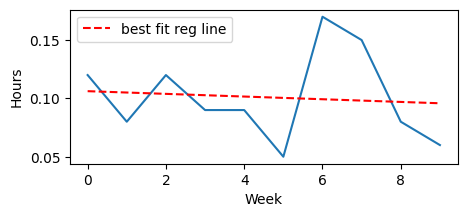

In [ ]:
# Plot 1 chart as an example
course_data = pt6_df[pt6_df['Course type'] == 'thesis']

course_data
wk_grp = course_data.groupby(by='Week')['Hours'].sum()

# get proportion of hours spent over total for each week
for key, value in wk_grp.items():
  wk_grp[key] = round((value / course_total_hrs), 2)

# plot
fig, ax = plt.subplots(figsize=(5, 2))
ax = sns.lineplot(data=wk_grp)

# calc regression
reg = linregress(x=wk_grp.index, y=wk_grp, alternative='two-sided')
line_range = wk_grp.index

# plot reg line
ax.plot(line_range, reg.intercept + reg.slope*line_range, color='red', linestyle='--', label = 'best fit reg line')
ax.legend()
fig.show()

In [ ]:
reg

LinregressResult(slope=-0.001151515151515151, intercept=0.10618181818181818, rvalue=-0.09072649651755038, pvalue=0.80316135450281, stderr=0.00446884943171534, intercept_stderr=0.02385712753948517)

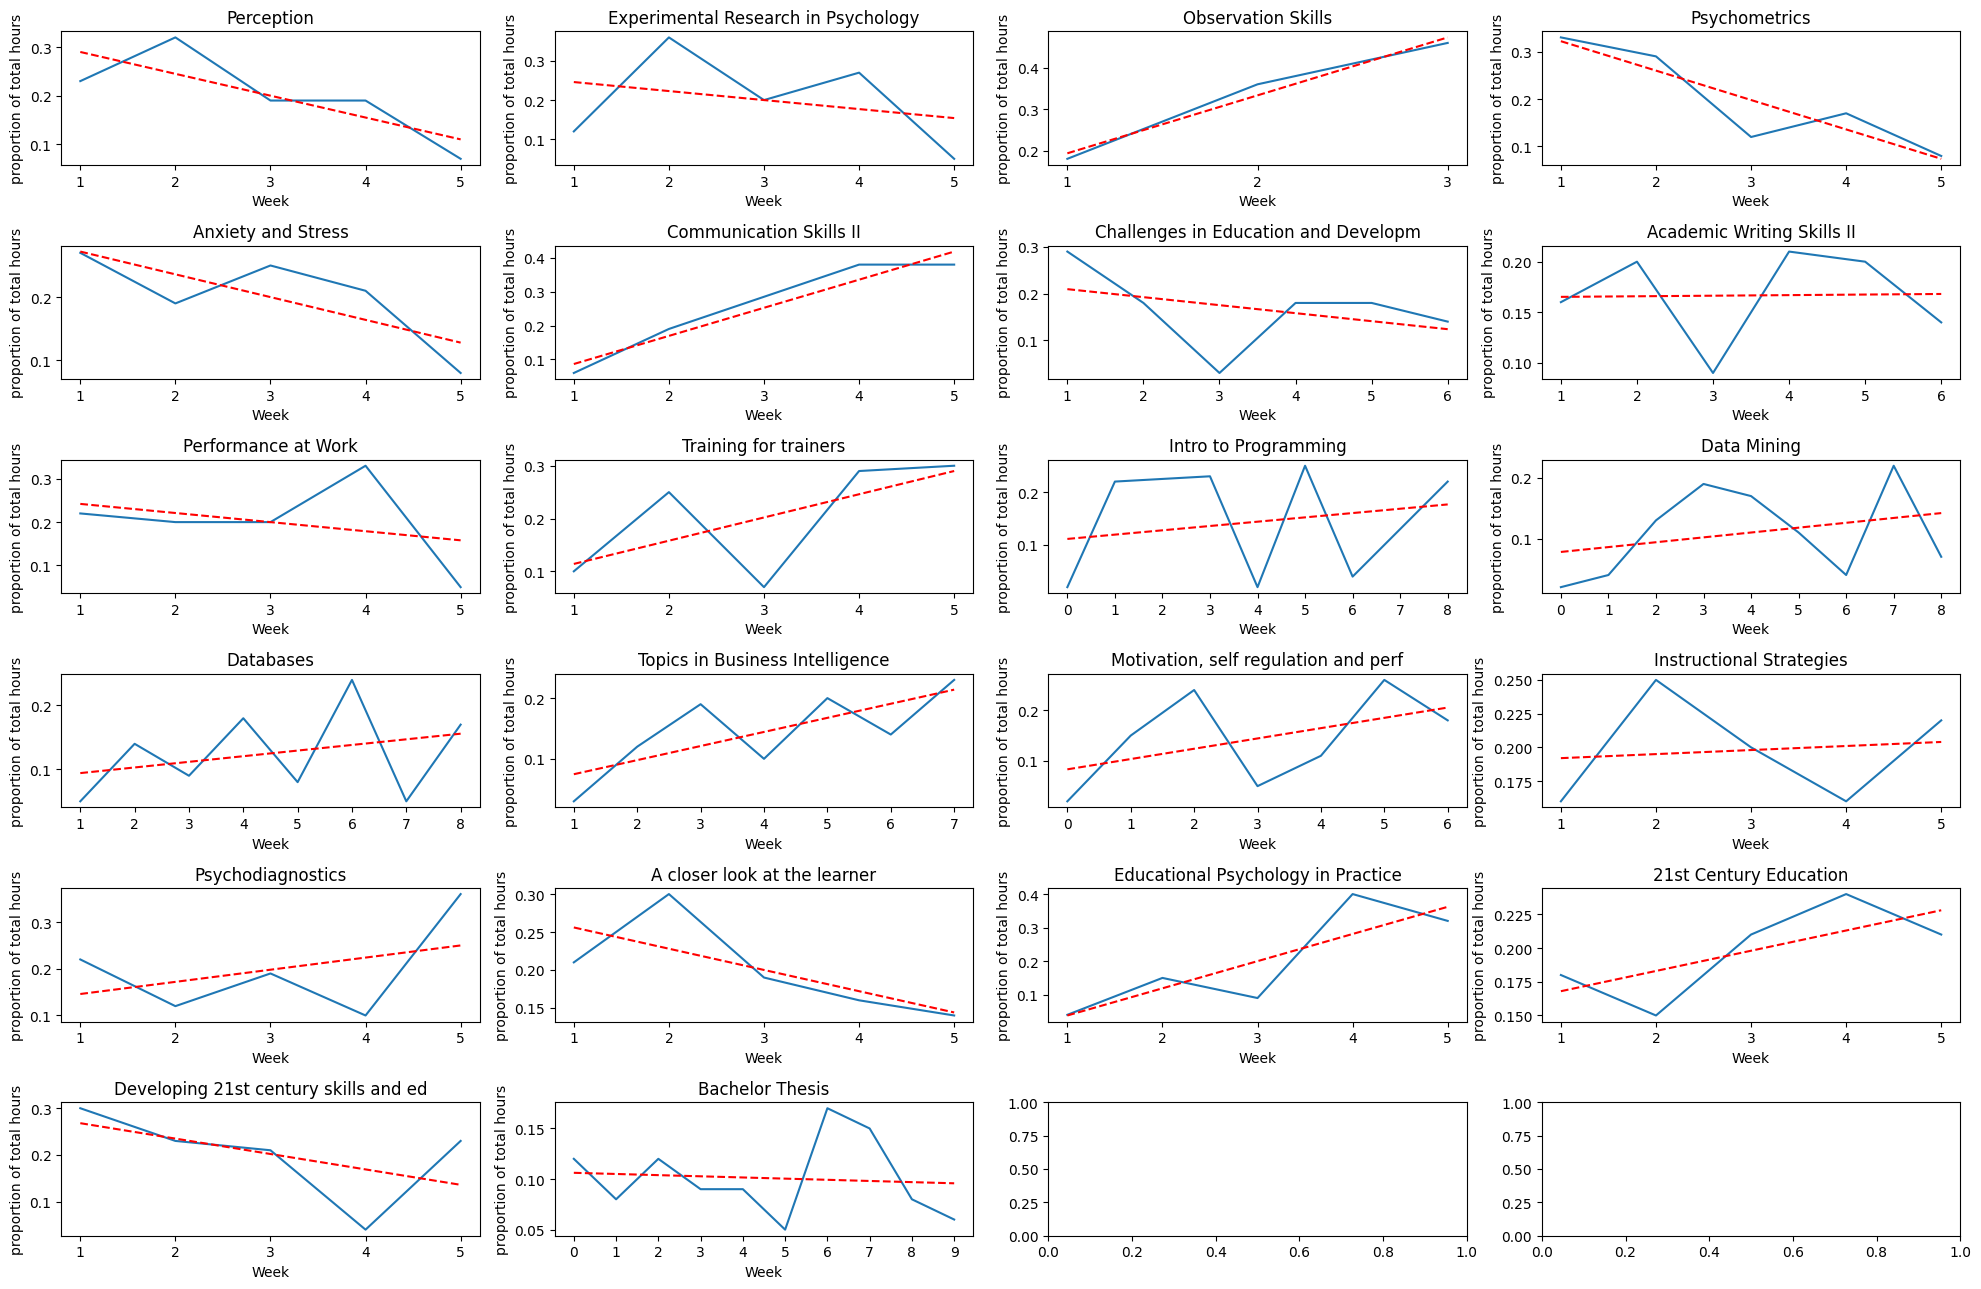

In [ ]:
row_n = 6
col_n = 4

fig, axes = plt.subplots(row_n, col_n, figsize=(20, 13))

# create a counter to loop through columns name list
iterator = 0

for row_num in range(row_n):
  for col_num in range(col_n):
    # select column name using the index
    course_name = course_names[iterator]
    # select rows for that course
    course_data = pt6_df[pt6_df['Course name'] == course_name]
    # get total hours spent for the course
    course_total_hrs = course_data['Hours'].sum()
    
    # group by week and then sum hours for each week
    wk_grp = course_data.groupby(by='Week')['Hours'].sum()
    
    # get proportion of hours spent over total for each week
    for key, value in wk_grp.items():
      wk_grp[key] = round((value / course_total_hrs), 2)
    
    # Plot data. set title & axis labels. Set grid
    sns.lineplot(ax=axes[row_num, col_num], data=wk_grp)
    axes[row_num, col_num].set(title=f'{course_name}', xlabel='Week', ylabel='proportion of total hours')
    #axes[row_num, col_num].grid(visible=True, which='both', axis='both')
    # show all weeks on x axis
    axes[row_num, col_num].set_xticks((np.arange(min(wk_grp.keys()), max(wk_grp.keys())+1, 1)))
    
    # plot reg line ~~~~~~
    # calc regression
    reg = linregress(x=wk_grp.index, y=wk_grp, alternative='two-sided')
    line_range = wk_grp.index
    # plot reg line
    axes[row_num, col_num].plot(line_range, reg.intercept + reg.slope*line_range, color='red', linestyle='--', label = 'best fit reg line')



    # add iterator
    iterator += 1

    # exit loop when iterator == number of coures
    if iterator == len(course_names):
      break
  if iterator == len(course_names):
    break

fig.tight_layout()
fig.show()

Q4: is there a correlation between hours spent and grades?

In [ ]:
# get sum of hours grouped by 'Course name'. Output as a series.
q4_hrs_by_course = df.groupby(by='Course name')['Hours'].sum().round()

# Convert to dataframe and reset index
q4_correl = q4_hrs_by_course.to_frame().reset_index()

# drop RTP + change Psychometrics to 'Psychometrics (course)' & 'Psychometrics (practical)'
q4_correl.drop(q4_correl[q4_correl['Course name']=='RTP'].index, inplace=True)

# Get hours for psychometrics
psychometrics_hrs = q4_correl[q4_correl['Course name'] == 'Psychometrics']['Hours'].values.tolist()[0]

# rows to add
to_add = {'Course name': ['Psychometrics (course)', 'Psychometrics (practical)'],
          'Hours': [psychometrics_hrs, psychometrics_hrs]
         }
to_add = pd.DataFrame(to_add)

# add to df
q4_correl = pd.concat([q4_correl, to_add], ignore_index=True)

In [ ]:
# Join hours dataframe and grade dataframe on 'Course name' column
q4_correl = q4_correl.merge(df_grades, how='inner', on='Course name')

In [ ]:
q4_correl.head()

,Course name,Hours,grade
0,21st Century Education,80.0,8.6
1,A closer look at the learner,79.0,7.2
2,Academic Writing Skills II,69.0,6.2
3,Anxiety and Stress,67.0,5.2
4,Challenges in Education and Developm,64.0,7.0


In [ ]:
# get Pearson Correlation Coefficient between Hours and grade
r_score = q4_correl['Hours'].corr(q4_correl['grade'])
print(f"Correlation between hours and grade is: {round(r_score, 2)}")

Correlation between hours and grade is: 0.21


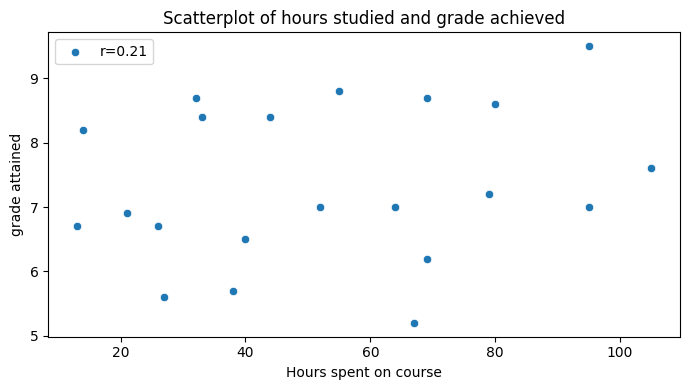

In [ ]:
q4_corr_figure = plt.figure(figsize=(7, 4))
q4_ax = sns.scatterplot(data=q4_correl, x='Hours', y='grade')
#q4_ax.grid(visible=True, which='both')
q4_ax.set(title='Scatterplot of hours studied and grade achieved', xlabel='Hours spent on course', ylabel='grade attained')
q4_ax.legend([f'r={round(r_score, 2)}'])

q4_corr_figure.tight_layout()
q4_corr_figure.show()

plot without pstychometrics score

Correlation between hours and grade is: 0.11


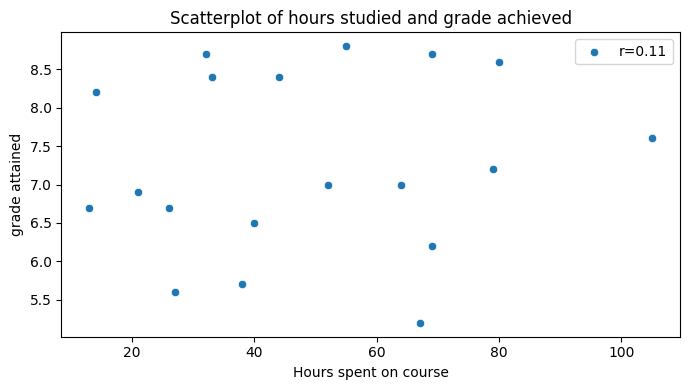

In [ ]:
# Copy prev data frame. Select courses that are not 'Psychometrics'
q4_correl_2 = q4_correl.copy()

q4_correl_2 = q4_correl_2[(q4_correl_2['Course name'] != 'Psychometrics (course)') & (q4_correl_2['Course name'] != 'Psychometrics (practical)')]

# get Pearson Correlation Coefficient between Hours and grade
r_score = q4_correl_2['Hours'].corr(q4_correl['grade'])
print(f"Correlation between hours and grade is: {round(r_score, 2)}")

# plot graph
q4_corr_figure = plt.figure(figsize=(7, 4))
q4_ax = sns.scatterplot(data=q4_correl_2, x='Hours', y='grade')
#q4_ax.grid(visible=True, which='both')
q4_ax.legend([f'r={round(r_score, 2)}'])
q4_ax.set(title='Scatterplot of hours studied and grade achieved', xlabel='Hours spent on course', ylabel='grade attained')

q4_corr_figure.tight_layout()
q4_corr_figure.show()